In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

digits = load_digits()


In [4]:
print("Img Data Shape",digits.data.shape)
print("Label Data Shape",digits.target.shape)

Img Data Shape (1797, 64)
Label Data Shape (1797,)


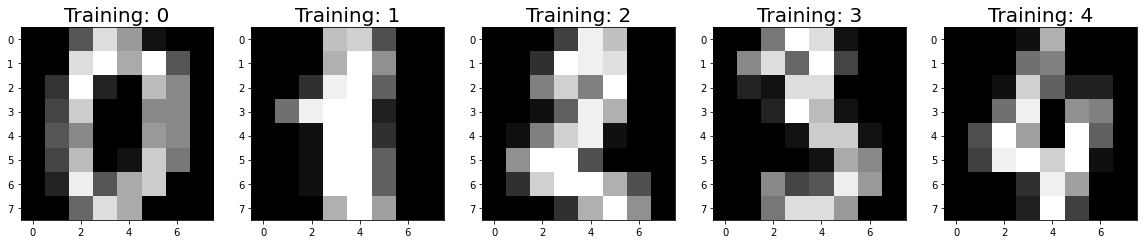

In [8]:
digits = load_digits()  # Load the digits dataset

plt.figure(figsize=(20, 4))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap='gray')
    plt.title("Training: %i" % label, fontsize=20)

plt.show()


In [9]:

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state = 0)

In [10]:
print("X train shape", X_train.shape)
print("X test shape", X_test.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)

X train shape (1437, 64)
X test shape (360, 64)
y train shape (1437,)
y test shape (360,)


In [12]:
from sklearn.linear_model import LogisticRegression

In [15]:
logisticRegr = LogisticRegression(solver='liblinear')
logisticRegr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [16]:
predictions = logisticRegr.predict(X_test)



In [17]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.95


In [19]:
confusionMatrics= metrics.confusion_matrix(y_test, predictions)
print (confusionMatrics)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  3  0]
 [ 0  0 34  2  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  1  0  0  1  0  0 37  0  0]
 [ 0  2  1  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  2 37]]


Text(0.5, 1.0, 'Accuracy Score: 0.95')

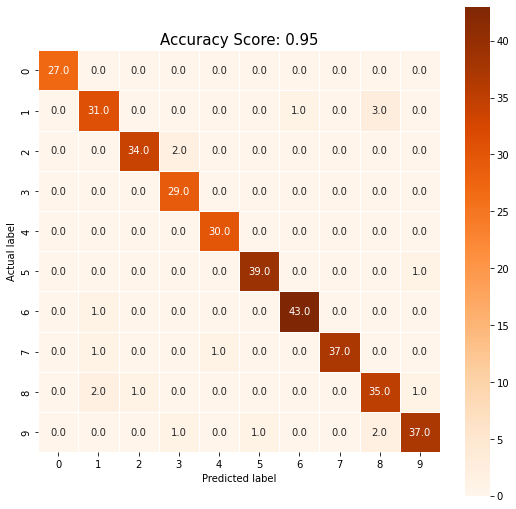

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))

sns.heatmap(confusionMatrics, annot=True, fmt=".1f", linewidths=.5, square=True, cmap="Oranges")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)


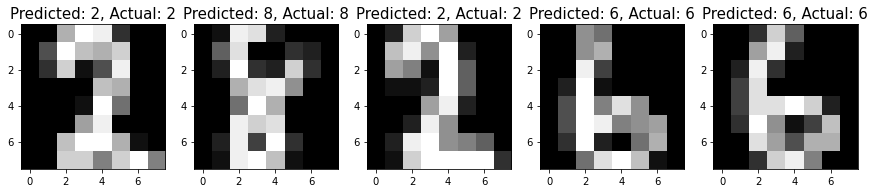

In [27]:
#Correct predictions
index = 0
classifiedIndex = []

for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1

plt.figure(figsize=(15, 3))

for plotIndex, wrong in enumerate(classifiedIndex[:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[wrong], (8, 8)), cmap='gray')
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize=15)

plt.show()

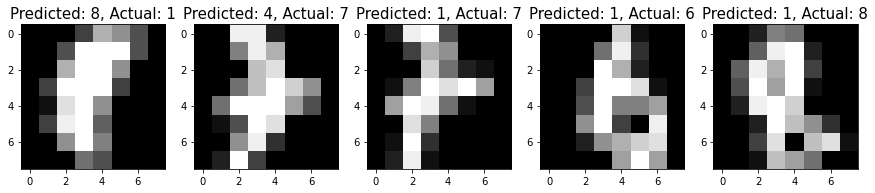

In [28]:
#Wrong predictions
index = 0
classifiedIndex = []

for predict, actual in zip(predictions, y_test):
    if predict != actual:
        classifiedIndex.append(index)
    index += 1

plt.figure(figsize=(15, 3))

for plotIndex, wrong in enumerate(classifiedIndex[:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[wrong], (8, 8)), cmap='gray')
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize=15)

plt.show()